1. Library Imports


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from scipy import stats


2- Data Loading

In [3]:
data = pd.read_csv("/workspaces/Data-analysis-2/Naive_Bayes_Classifier/pima_indians_diabetes.csv")


3. Basic Data Exploration


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data.shape)

(768, 9)


In [6]:
data_summary = data.describe().T

data_summary.style.background_gradient(cmap="Blues")


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


4.Missing Values Analysis

In [9]:
print("Total Missing Values Numbers of columns;")
isnull = pd.DataFrame(data.isnull().sum())
isnull.style.background_gradient(cmap="ocean")

Total Missing Values Numbers of columns;


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
data.isin([0]).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

5. Pie Chart for Outcome Distribution


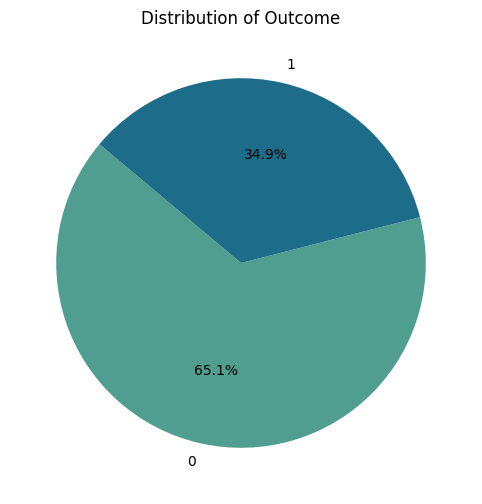

In [11]:
# Assuming 'target' is the 'Outcome' column from df1
target = data['Outcome']

outcome_counts = target.value_counts()

palette = sns.color_palette("crest", len(outcome_counts))

plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, colors=palette, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Outcome')

# Display the plot
plt.show()


In [12]:
def univariateAnalysis_numeric_plots(column, data, nbins=100):
    # Boxplot
    plt.figure()
    print("\nBoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=data[column])
    plt.show()
    
    # Distribution plot (Distplot)
    plt.figure()
    print("\nDistplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(data[column], kde=True, color='blue')
    plt.show()
    
    # Histogram without KDE
    plt.figure()
    print("\nHistogram of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(data[column], kde=False, color='red')
    plt.show()

    # Histogram with mean, median, and mode
    plt.figure()
    print("\nHistogram with mean, median, and mode of " + column)
    print("----------------------------------------------------------------------------")
    mean = data[column].mean()
    median = data[column].median()
    mode = data[column].mode()

    print('Mean: ', mean, '\nMedian: ', median, '\nMode: ', mode[0])
    plt.hist(data[column], bins=nbins, color='lightblue')  # Plot the histogram
    plt.axvline(mean, color='green', label='Mean')  # Line for mean
    plt.axvline(median, color='blue', label='Median')  # Line for median
    plt.axvline(mode[0], color='red', label='Mode1')  # Line for mode
    plt.legend()  # Plot the legend
    plt.show()
    
    # Skewness of the column
    print("\nSkewness of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].skew())



BoxPlot of Glucose
----------------------------------------------------------------------------


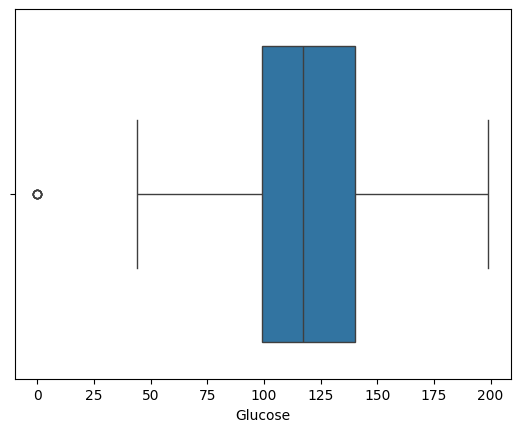


Distplot of Glucose
----------------------------------------------------------------------------


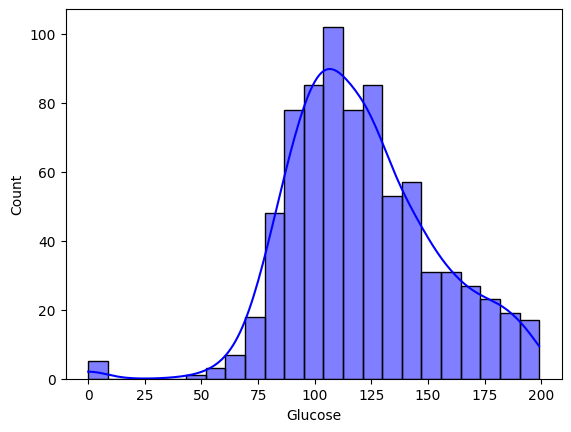


Histogram of Glucose
----------------------------------------------------------------------------


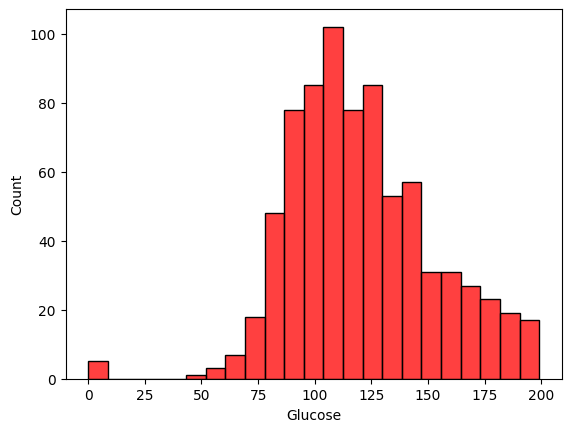


Histogram with mean, median, and mode of Glucose
----------------------------------------------------------------------------
Mean:  120.89453125 
Median:  117.0 
Mode:  99


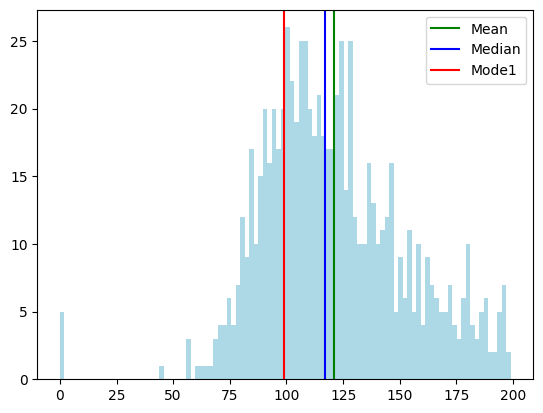


Skewness of Glucose
----------------------------------------------------------------------------
0.17375350179188992


In [13]:
univariateAnalysis_numeric_plots('Glucose', data)


2. Box Plot for Each Feature by Outcome


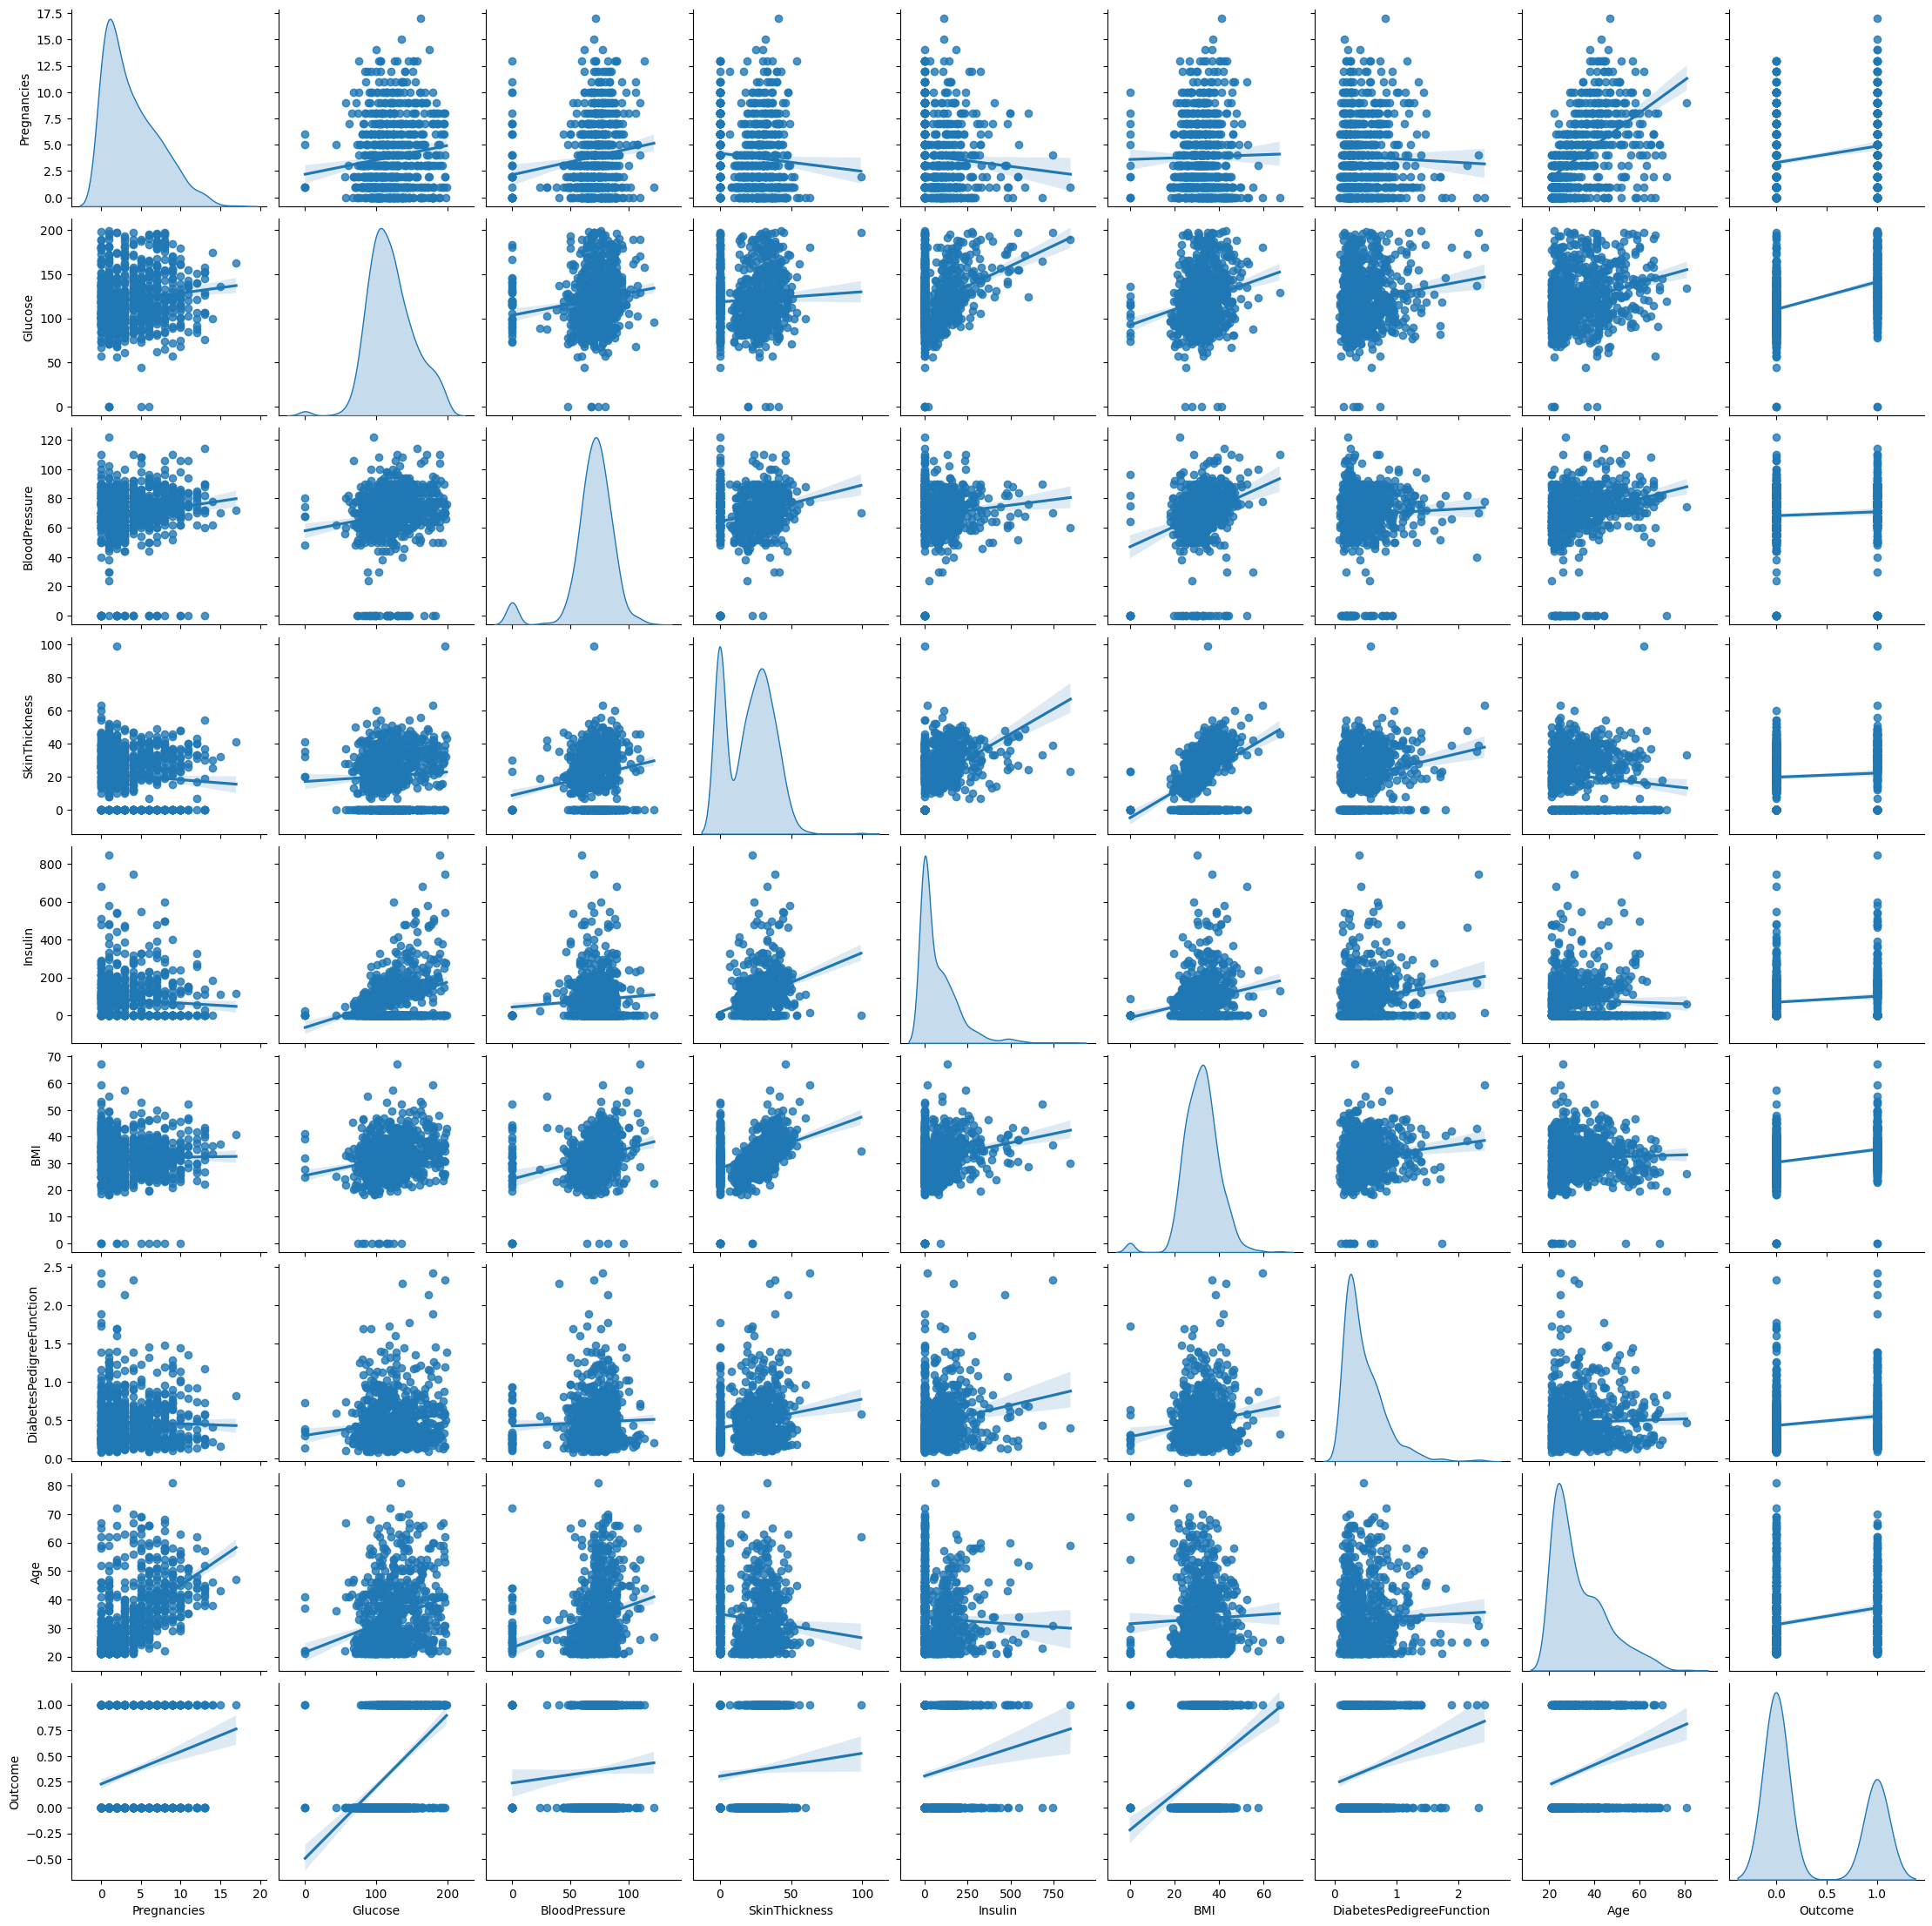

In [14]:
sns.pairplot(data,diag_kind='kde',kind='reg')


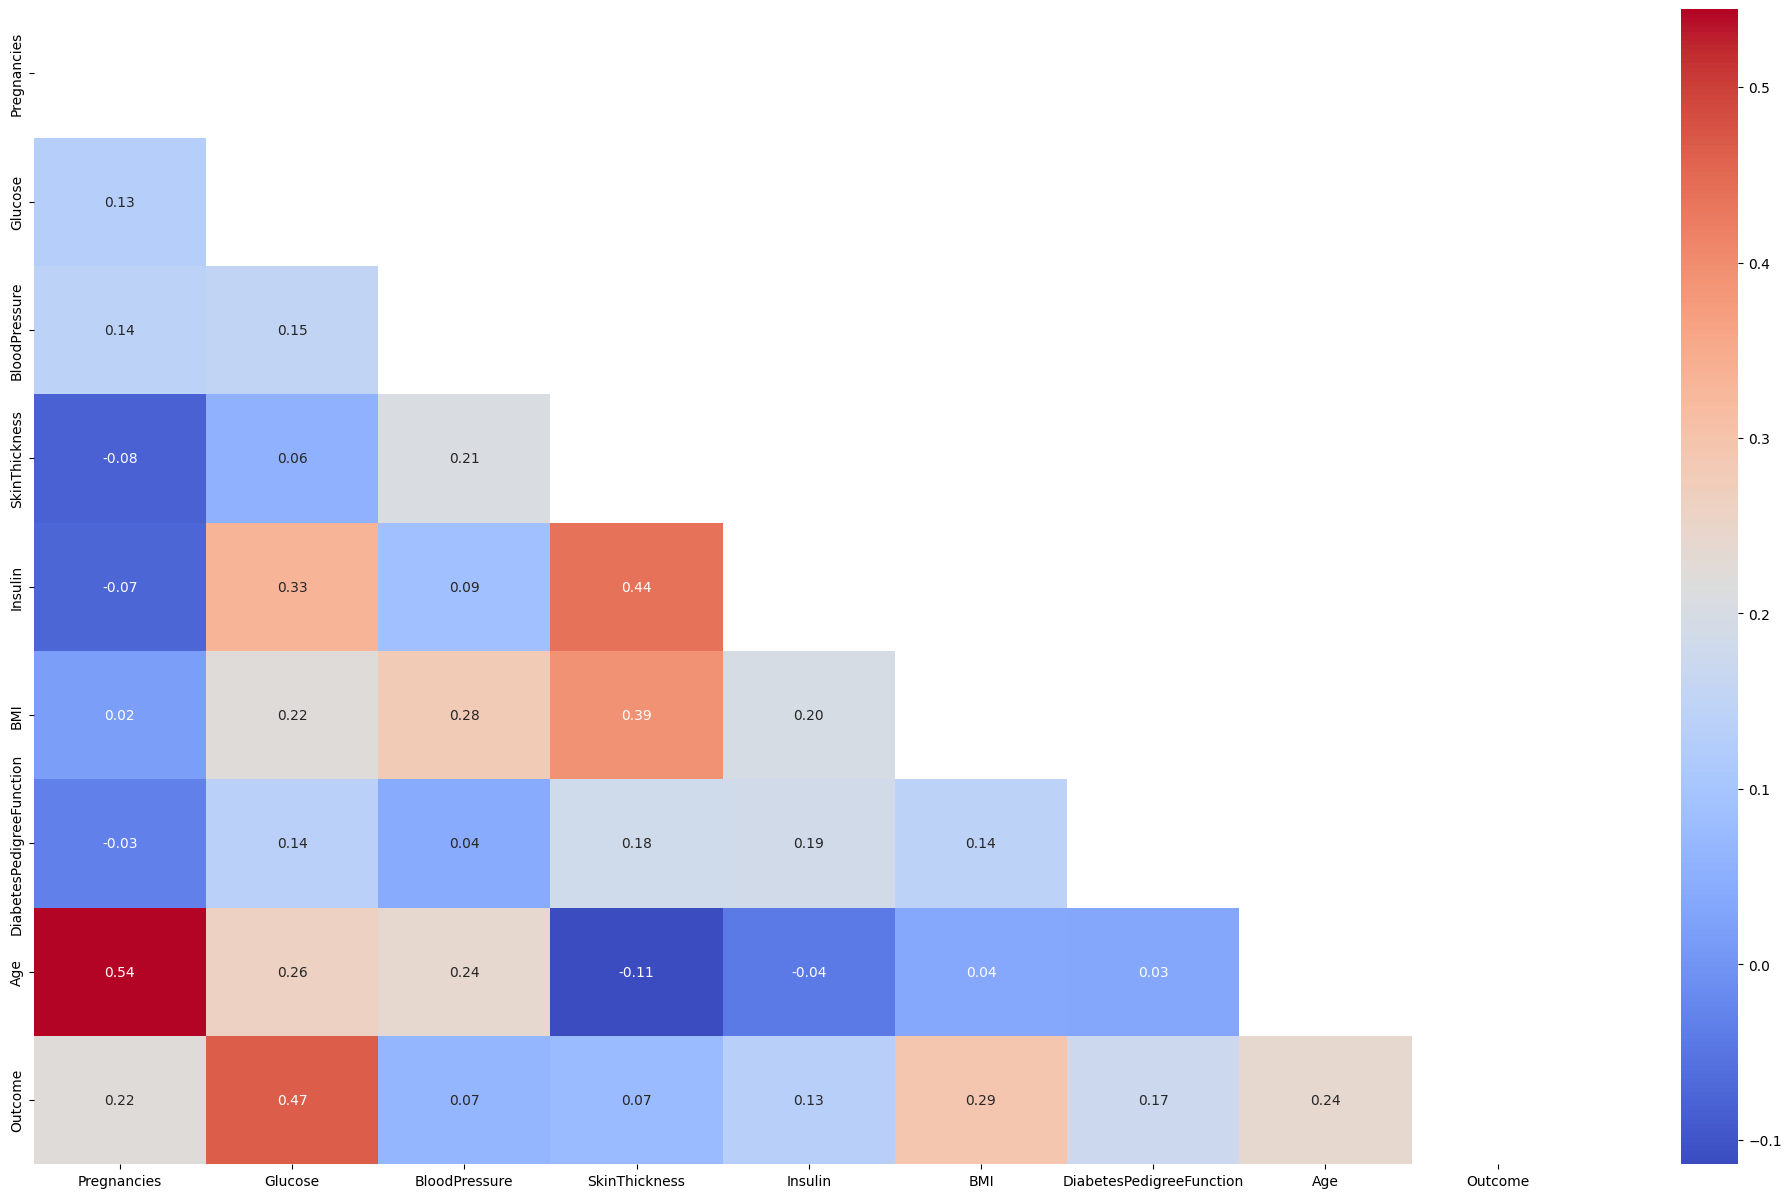

In [15]:
corr = data.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))  # Use dtype=bool instead of np.bool (deprecated)
plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='coolwarm')
plt.show()


**Data Modeling**


1. Handling Missing Values (Zeros):


In [16]:
from sklearn.impute import SimpleImputer  
# Assuming 'data' is your dataset and 'Outcome' is the target column
X = data.drop(columns=['Outcome'], axis=1)
Y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=82)

# Now X_train and X_test are defined, and we can apply the imputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# Save column names to assign them back after transformation
cols = X_train.columns

# Replace 0s in the training and testing data
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.transform(X_test))

# Reassign the original column names to the transformed DataFrames
X_train.columns = cols
X_test.columns = cols

# Check the head of the transformed training data
X_train.head()

# Train and evaluate the model using cross-validation
model = GaussianNB()
cv_scores = cross_val_score(model, X, Y, cv=5)

# Output the cross-validation accuracy and variance
print(model, 'mean accuracy:', round(cv_scores.mean() * 100, 3), '% std:', round(cv_scores.var() * 100, 3), '%')


GaussianNB() mean accuracy: 75.134 % std: 0.035 %


2. Creating a DataFrame with Zero Values:


In [17]:
# Create a new DataFrame that contains rows with any 0 values in any cell
data1 = data.copy()
data1 = data1.drop(columns=['Outcome'], axis=1)  # Drop the target column 'Outcome'
data1 = data1[(data1 == 0).any(axis=1)]  # Keep rows where any column has a 0 value


In [18]:
#Conditional Formatting in pandas - Colouring cells having 0 (zero) values

data1.style.applymap(lambda x: 'background-color : red' if x==0 else '')


/tmp/ipykernel_10335/2217298507.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data1.style.applymap(lambda x: 'background-color : red' if x==0 else '')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
4,0,137,40,35,168,43.100000,2.288000,33
5,5,116,74,0,0,25.600000,0.201000,30
7,10,115,0,0,0,35.300000,0.134000,29
9,8,125,96,0,0,0.000000,0.232000,54
10,4,110,92,0,0,37.600000,0.191000,30
11,10,168,74,0,0,38.000000,0.537000,34
12,10,139,80,0,0,27.100000,1.441000,57


Imputing 0 (zero) values with mean


In [19]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols = X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5.0,88.0,66.0,21.0,23.000000,24.4,0.342,30.0
1,1.0,126.0,56.0,29.0,152.000000,28.7,0.801,21.0
2,7.0,187.0,50.0,33.0,392.000000,33.9,0.826,34.0
3,5.0,158.0,84.0,41.0,210.000000,39.4,0.395,29.0
4,8.0,85.0,55.0,20.0,153.589744,24.4,0.136,42.0


In [20]:
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 154 points : 32


accuracy_score on train dataset:  0.742671009771987
accuracy_score on test dataset:  0.7922077922077922
Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       393
           1       0.65      0.61      0.63       221

    accuracy                           0.74       614
   macro avg       0.72      0.71      0.72       614
weighted avg       0.74      0.74      0.74       614

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



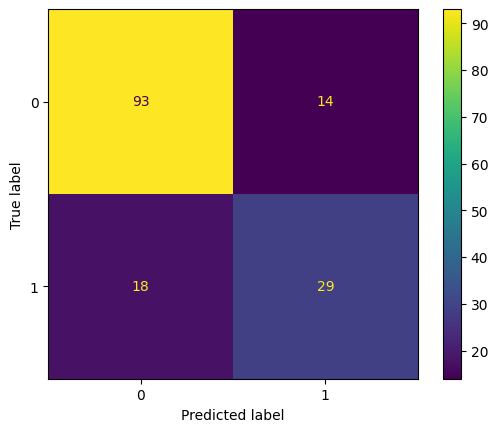

In [21]:
# Correct import statement
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train the model and make predictions
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset: ', accuracy_train)

# Predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, predict_test)
print('accuracy_score on test dataset: ', accuracy_test)

# Print the classification report for train and test datasets
print("Classification Report for Train Data:\n", classification_report(y_train, predict_train))
print("Classification Report for Test Data:\n", classification_report(y_test, predict_test))

# Confusion Matrix for test data
conf_matrix = confusion_matrix(y_test, predict_test)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


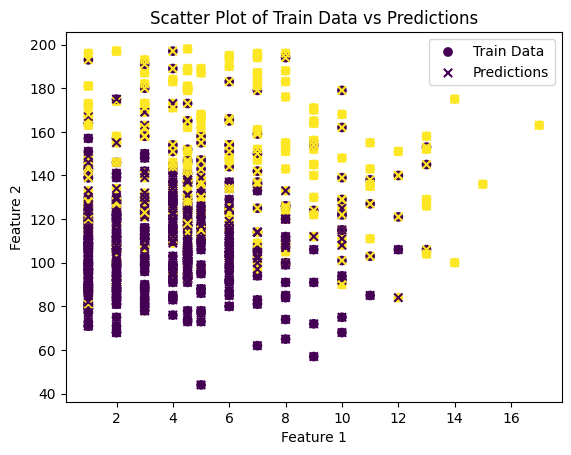

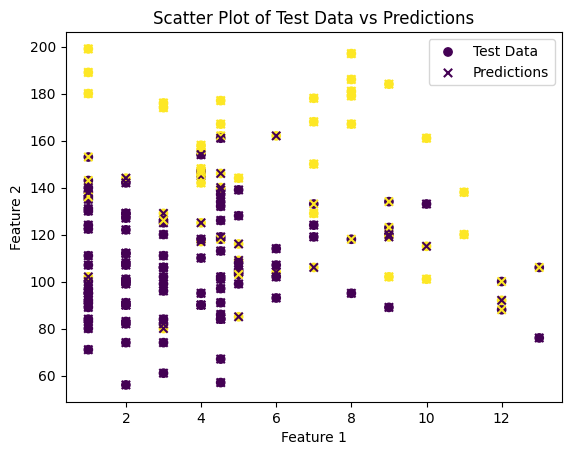

In [22]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train Data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict_train, marker='x', label='Predictions')
plt.title("Scatter Plot of Train Data vs Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Test Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predict_test, marker='x', label='Predictions')
plt.title("Scatter Plot of Test Data vs Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


/home/codespace/.python/current/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


                Model  Accuracy (%)
0    Base Naive Bayes     78.571429
1            AdaBoost     78.571429
2  Best Random Forest     79.220779
3      Neural Network     81.818181


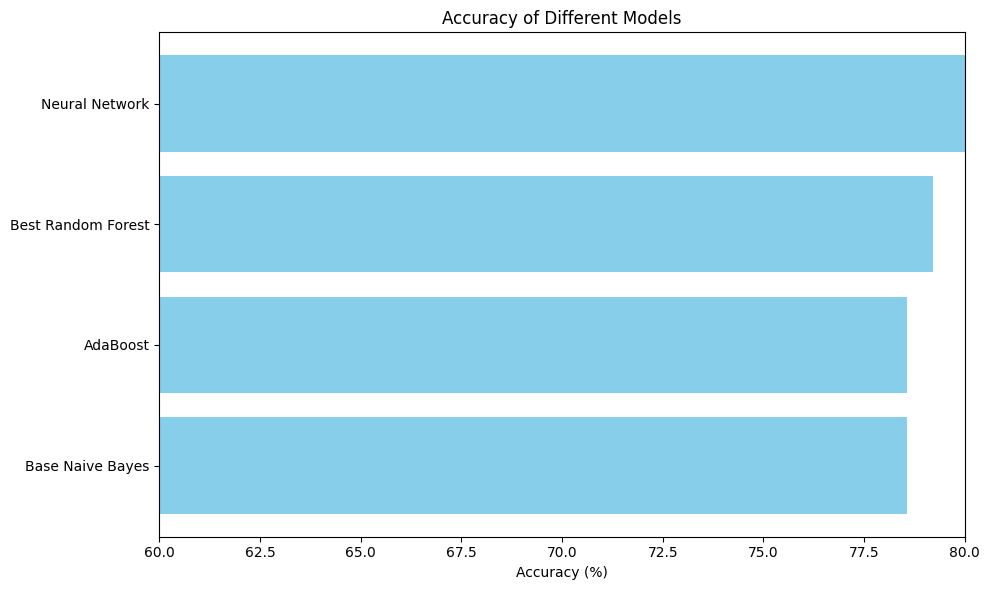

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential  
from keras.layers import Dense, Input 
from keras.callbacks import EarlyStopping  

X = data.drop(columns=['Outcome']) 
y = data['Outcome']  
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, model_accuracies):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    model_accuracies[model_name] = accuracy

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

# Optionally scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_accuracies = {}

# 1. Base Naive Bayes
train_evaluate_model(GaussianNB(), X_train, y_train, X_test, y_test, 'Base Naive Bayes', model_accuracies)


# 2. AdaBoost
train_evaluate_model(AdaBoostClassifier(n_estimators=100, random_state=42, algorithm='SAMME'), X_train, y_train, X_test, y_test, 'AdaBoost', model_accuracies)

# 3. Best Random Forest via Grid Search
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
model_accuracies['Best Random Forest'] = accuracy_score(y_test, y_pred_rf_best) * 100

# 4. Neural Network
nn_model = Sequential()
nn_model.add(Input(shape=(X_train_scaled.shape[1],)))
nn_model.add(Dense(12, activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.2, callbacks=[early_stopping])
_, accuracy_nn = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
model_accuracies['Neural Network'] = accuracy_nn * 100

# Create a DataFrame to display models and their accuracies
df_accuracies = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy (%)'])

# Display the DataFrame
print(df_accuracies)

# Plot the accuracies of the models
plt.figure(figsize=(10, 6))
plt.barh(df_accuracies['Model'], df_accuracies['Accuracy (%)'], color='skyblue')
plt.xlabel("Accuracy (%)")
plt.title("Accuracy of Different Models")
plt.xlim(60, 80)
plt.tight_layout()

# Show the plot
plt.show()
